# Downloading Overlays

This notebook covers how to download an overlay and related topics.  
## 1. Instantiating an overlay
To instantiate an overlay,  the corresponding bitstream file can be:
 1. In the location of the Pynq python package: /pynq/bitstream/
 2. In any location accessable in the file system.
 
In the first case, users can just simply use the bitstream name to instantiate the overlay, as shown below.

In [1]:
from pynq import Overlay
ol = Overlay("pmod.bit")

In the second case, users can use absolute file path to instantiate the overlay.

In [2]:
from pynq import Overlay
ol = Overlay("/home/xpp/pynq/bitstream/pmod.bit")

To check the timestamp of the overlay:

In [3]:
ol.download()
ol.timestamp

'2016/5/19 18:59:41 +730983'

## 2. Checking the PL
There can be multiple overlay instances, but there is only one overlay that is currently loaded onto the programmable logic (PL). 

** It is always recommended to query the PL instance, since it is a singleton indicating the current status of the FPGA. **

To check what is currently loaded on the PL:

In [4]:
from pynq import PL
PL.bitfile_name

'/home/xpp/pynq/bitstream/pmod.bit'

In [5]:
PL.timestamp

'2016/5/19 18:59:41 +730983'

Users can verify whether an overlay has been loaded. The following method checks both the `bitfile_name` and `timestamp` before returning the result.

In [6]:
ol.is_loaded()

True

## 3. Overlay downloading overhead

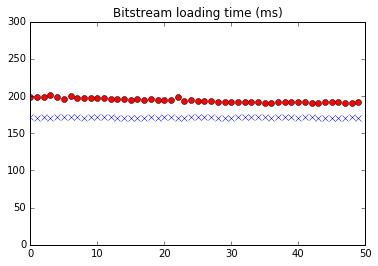

In [7]:
import time
import matplotlib.pyplot as plt
from pynq import Overlay

ol1 = Overlay("pmod.bit")
ol2 = Overlay("audiovideo.bit")
length = 50
log1 = []
log2 = []
for i in range(length):
    start = time.time()
    ol1.download()
    end = time.time()
    # Record milliseconds
    log1.append((end-start)*1000)
    
for i in range(length):
    start = time.time()
    ol2.download()
    end = time.time()
    # Record milliseconds
    log2.append((end-start)*1000)

# Draw the figure
%matplotlib inline
plt.plot(range(length), log1, 'ro')
plt.plot(range(length), log2, 'bx')
plt.title('Bitstream loading time (ms)')
plt.axis([0, length, 0, 300])
plt.show()

ol1.download()
del ol1,ol2